<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Array-Operations-in-Python" data-toc-modified-id="Basic-Array-Operations-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Array Operations in Python</a></span></li><li><span><a href="#General-Purpose-DSP-Functions" data-toc-modified-id="General-Purpose-DSP-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General Purpose DSP Functions</a></span><ul class="toc-item"><li><span><a href="#Unit-Step" data-toc-modified-id="Unit-Step-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Unit Step</a></span></li><li><span><a href="#Convolution" data-toc-modified-id="Convolution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Convolution</a></span></li><li><span><a href="#Analog-filter-functions" data-toc-modified-id="Analog-filter-functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analog filter functions</a></span></li></ul></li></ul></div>

In [1]:
import cmath as cm
import math as ma
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

## Basic Array Operations in Python

In [2]:
#define array using numpy
A = np.array([1,2,3,4])
#Raise array to a power and sum each element
A**2

array([ 1,  4,  9, 16], dtype=int32)

In [3]:
#define array using standard library
A = [1,2,3,4]
#A**2 #does not work
# using list comprehension
[i**2 for i in A]

[1, 4, 9, 16]

In [4]:
# multiply 2 arrays with built-in
A = [1,2,3,4]
B = [4,5,6,7]
C = []
for i,j in zip(A,B):
    C.append(i*j)
C

[4, 10, 18, 28]

In [5]:
# Using numpy
A = np.array(A)
B = np.array(B)
C = A*B
C

array([ 4, 10, 18, 28])

In [6]:
# Indexing
A = [1,2,3,4]
A[0]

1

In [7]:
A[:2]

[1, 2]

In [8]:
A[2:]

[3, 4]

In [9]:
A[2]

3

## General Purpose DSP Functions

In [10]:
# helper
def linspace(start,stop,step=None):
    '''Returns a numpy array of values with optional step parameter. 
    '''
    if step != None:
        return np.arange(start,stop,step)
    else:
        return np.arange(start,stop)
    
def nsize(xn, zero_index):
    '''Generate an array sized from the input array [xn] and shifted according to zero index\n
       zero index is the nth integer from the left ie... [1,0,8,2], 8 is 3rd integer so zero_index is 3
    '''
    stop = (len(xn) - zero_index) + 1 #defines end point of array
    start = -(abs((len(xn))) - stop)
    return list(range(start,stop))    

syms = symbols

$\sum_{n=0}^{n} Asin(2 \pi f n) $

In [11]:
def sinsum(amplitude,f,n):
    '''Compute sum of simusoidal terms of the form shown above'''
    A = amplitude
    W = 2*ma.pi*f
    Wn = W*n
    T = 1/f
    step = (n[1]-n[0])
    xn = A * np.array(np.sin(Wn))
    print(f"Frequency = {f:0.2f} Hz\nAmplitude = {A:0.2f} units\nAng Freq  = {W:0.2f} Rad/s\nPeriod    = {T:0.2f} s")
    print(f"Step size = {step}\nSample range: ({min(n)} < n < {max(n+step)})")
    return xn

Frequency = 1.00 Hz
Amplitude = 1.00 units
Ang Freq  = 6.28 Rad/s
Period    = 1.00 s
Step size = 0.02
Sample range: (0.0 < n < 1.0)


<StemContainer object of 3 artists>

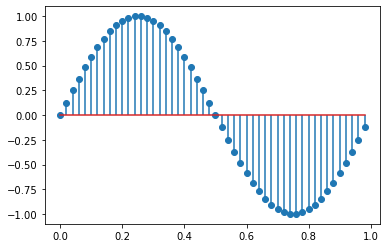

In [12]:
A = 1
f= 1
n = linspace(0,1,0.02)
xn = sinsum(A,f,n)
plt.stem(n,xn)

### Unit Step

In [13]:
def ustep(n0,n1,n2,plot=None):
    if n0 < n1 or n0 > n2 or n1 > n2:
        print("error, args must be n1 <= n0 <= n2")
    n = list(range(n1,n2+1))
    x = []
    for i in range(len(n)):
        nt = (1 if n[i]-n0 >= 0 else 0)
        x.append(nt)
    if plot == True:
        plt.rcParams["figure.figsize"] = [10, 5]
        plt.rcParams["figure.autolayout"] = True
        plt.stem(n,x)
        plt.xlabel('n')
        plt.ylabel('y[n]')
        plt.grid('on')
        plt.axis([-0.1+min(n), 0.1+max(n), -0.1+min(x), 0.1+max(x)])
    else:
        return np.array(x)

In [18]:
ustep(10,2,1)

error, args must be n1 <= n0 <= n2


array([], dtype=float64)

### Convolution

In [ ]:
# modified convolution function
def conv_m(x,xn,h,nh,plot=None):
    minN = min(xn) + min(hn)
    maxN = max(xn) + max(hn)
    yn = np.array((range(minN, maxN + 1)))
    y = conv(x,h)
    sol =  {'n':yn,'y':y}
    if plot == True:
        plt.rcParams["figure.figsize"] = [10, 5]
        plt.rcParams["figure.autolayout"] = True
        plt.stem(sol['n'],sol['y'])
        plt.xlabel('n')
        plt.ylabel('y[n]')
        plt.title('Convolution Plot')
        for i, j in zip(sol['n'], sol['y']):
            plt.text(i, j+1.5, '({})'.format(j))
        return sol
    else:     
        return y

### Analog filter functions
* incomplete

In [16]:
# fix to return b,a
def afd_butt(Wp,Ws,Rp,As):
    expr1 = Wp <= 0
    expr2 = Ws <= Wp
    expr3 = Rp <= 0
    expr4 = As < 0
    if expr1:
        raise Exception("Passband edge must be larger then 0")
    if expr2:
        raise Exception("Stopband edge must be larger than passband edge")
    if expr3 or expr4:
        raise Exception("PB ripple and/or SB attenuation must be larger then 0")
    N = ma.ceil((ma.log10((10**(Rp/10)-1)/(10**(As/10)-1)))/(2*ma.log10(Wp/Ws)))
    OmegaC = Wp/((10**(Rp/10)-1)**(1/(2*N)))
    return {'order':N,'Wc':OmegaC}

In [17]:
# Analog filter order and Wc
afd_butt(0.2*ma.pi,0.3*ma.pi,0.25,43)

{'order': 16, 'Wc': 0.6863292436130353}